In [ ]:
---
title: "Exploring Hunt Showdown's Medium Slot Guns"
description: "Just Some Fun Data Analysis, Take Two"
image: "../_images/headers/medium-slot-weapons-header.png"
categories:
- python
- data analysis
- hunt showdown
- datasets
date: '2024-02-14'
layout: post
toc: true
---

# So, What About Medium Weapons?
Picking up where the last post left off, I am going to move on to exploring the Medium slot weapons.
This post took quite a bit longer since there was a new Hunt event and I ended up enjoying playing more than writing this. There were some updates as well as new weapons in the category to be added to the data.
But, the analysis continues starting with the default imports!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pathlib import Path

# Don't forget to install openpyxl otherwise you will get an import error.
# some plot configs I like
pal = sns.dark_palette("seagreen", n_colors=4)
plt.rcParams["figure.figsize"] = (14,7);

In [3]:
#| echo: false
dataDirectory = Path("data")
#dataDirectory = Path("_data")
filename = 'Hunt_Status_Medium.xlsx'

## Extracting the Weapons
Since we're not interested in the other category of weapons - and I have not finished updating the large weapons yet - the first step is to filter the slot size:

In [11]:
data = pd.read_excel(dataDirectory/filename, sheet_name='Stats', na_values='N/a')
data = data.assign(
    Slot = data.Slot.astype('category'),
    Type = data['Ammo Type'].astype('category'),
    Addendum = data['Addendum Bullet'].astype('bool')
).drop(
    ['Ammo Type', 'Addendum Bullet'],
    axis=1
)
mediums = data.query('Slot == "Medium"')

# example slice
mediums.iloc[1:10,1:10]

,Slot,Cost,Damage,Muzzle Velocity,Falloff 10m,Falloff 25m,Falloff 50m,Falloff 75m,Barrel Count
73,Medium,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Medium,57.0,227.0,NaN,150.0,150.0,150.0,76.0,1.0
75,Medium,440.0,120.0,450.0,120.0,116.0,92.0,70.0,9.0
76,Medium,470.0,120.0,450.0,120.0,116.0,92.0,70.0,9.0
77,Medium,500.0,120.0,315.0,120.0,120.0,104.0,76.0,9.0
78,Medium,505.0,157.0,350.0,150.0,89.0,61.0,55.0,1.0
79,Medium,485.0,1.0,75.0,1.0,1.0,1.0,1.0,1.0
80,Medium,450.0,40.0,75.0,NaN,NaN,NaN,NaN,1.0
81,Medium,180.0,80.0,400.0,80.0,74.0,41.0,27.0,5.0


### How much is the average cost of a medium sized gun?
So, let's get into some simple questions start with the average cost of a medium slot weapon.
Like other posts, you can simply ask for the mean and median of the **Cost** column.

In [16]:
# How much is the average cost of the guns?
f"The mean cost of Medium Slot guns is ${round( mediums.Cost.mean(), 2)}. The median cost of Medium Slot guns is ${round( mediums.Cost.median(), 2)}."

'The mean cost of Medium Slot guns is $172.15. The median cost of Medium Slot guns is $93.5.'

Looking at the two numbers, there are some outliers which are pulling the average further upwards.

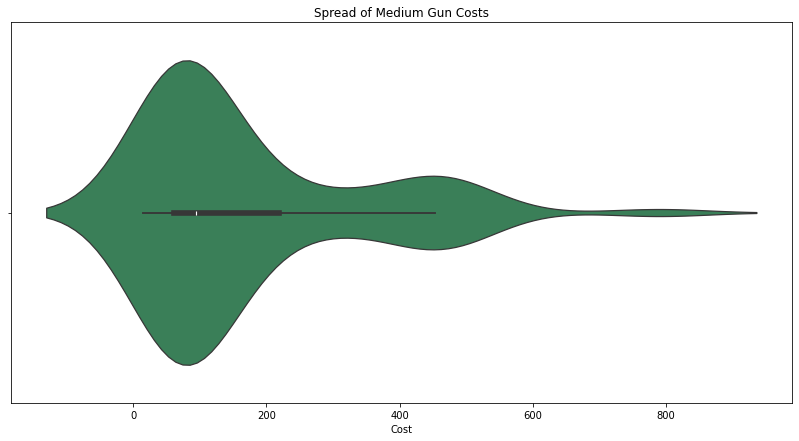

In [23]:
# I really like violin plots and they've grown on me
sns.violinplot(mediums, x='Cost', color='seagreen').set_title("Spread of Medium Gun Costs");

So, how does this compare to the damage you get from the medium slot guns?

In [37]:
# How much is the average damage per gun?
f"The Mean Damage of Medium Slot guns is {round( mediums.Damage.mean())}. The Median Damage of Medium Slot guns is {round( mediums.Damage.median())}."

'The Mean Damage of Medium Slot guns is 113. The Median Damage of Medium Slot guns is 110.'

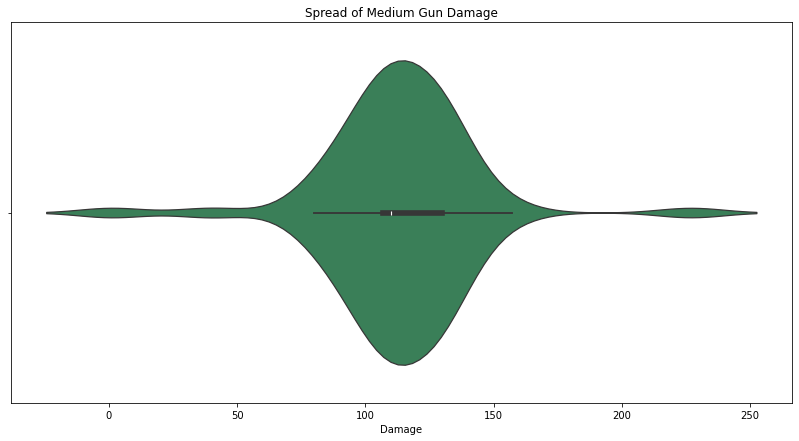

In [38]:
# I really like violin plots and they've grown on me
sns.violinplot(mediums, x='Damage', color='seagreen').set_title("Spread of Medium Gun Damage");

These two graphs make little sense without understanding Hunt: Showdown. Looking at this, you may ask "*Why wouldn't you just buy a more expensive gun?*" And, the answer to this was touched on in the previous post: *Fall Off Damage*.
Different bullet types have different distance falls offs which influence how much damage the bullet actually does. We can see this visually for the Fall off; most weapons are fine at 10m but not at 75m. If you can engage a fellow Hunter under the 50m range then the cheaper guns are just as effective.

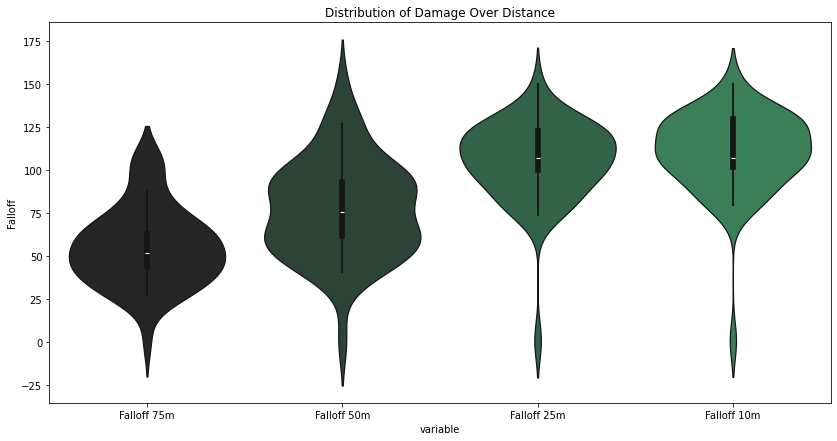

In [27]:
tmp = mediums.melt(id_vars=['Weapon', 'Type'], value_vars=['Falloff 75m', 'Falloff 50m', 'Falloff 25m', 'Falloff 10m'], value_name='Falloff')
sns.violinplot(tmp, x='variable', y='Falloff', palette=pal, hue='variable', legend=False).set_title("Distribution of Damage Over Distance");

Another reason for the difference is **Muzzle Velocity** again; or, how long it takes for the bullet to reach the target. The faster the bullet then the more it costs. Again, the closer you are to the target then the less the bullet speed matters. And therefore, the cheaper weapons will still handle just fine. But, how do these bullet speeds compare in just this category?

In [28]:
f"The Mean Muzzle Velocity of Medium Slot guns is {round( mediums['Muzzle Velocity'].mean())}. The Median Muzzle Velocity of Medium Slot guns is {round( mediums['Muzzle Velocity'].median())}."

'The Mean Muzzle Velocity of Medium Slot guns is 413. The Median Muzzle Velocity of Medium Slot guns is 410.'

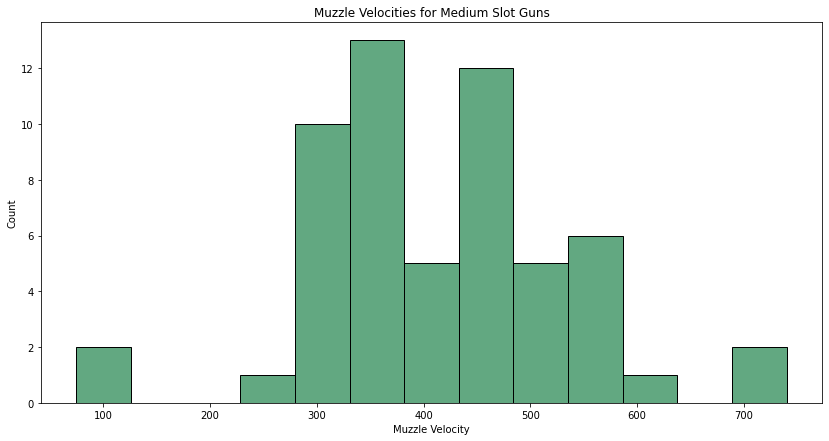

In [39]:
# What is the variability in the muzzle velocity here?
sns.histplot(mediums['Muzzle Velocity'], color='seagreen').set_title("Muzzle Velocities for Medium Slot Guns");

So, what is up with those outliers on both sides? Everything else falls nicely in the middle area?

In [31]:
mediums\
    .loc[ (mediums['Muzzle Velocity'] < 300) | (mediums['Muzzle Velocity'] > 600)]\
    [['Weapon', 'Type', 'Muzzle Velocity']]\
    .style.hide(axis='index')

Weapon,Type,Muzzle Velocity
LeMat Mark II UpperMat,Starshell,75.000000
LeMat Mark II UpperMat,Dragon Breath,75.000000
Mosin-Nagant N1891 Obrez,Spitzer,740.000000
Mosin-Nagant N1891 Obrez Drum,Spitzer,740.000000
Scottfield Model 3 Precision,Medium,280.000000
Scottfield Model 3 Precision,Incendiary,280.000000
Scottfield Model 3 Precision,Full Metal Jacket,250.000000


Spitzer is a long ammo variant which is **significantly** increases the Muzzle Velocity so that explains the high values. And, the Shotgun shell variants along with the poor Scottfield Model 3 Precision which has one of the worst velocities in the game. And, while we're bringing up these different ammo types we should discuss some differences here. The big one to bring up is **Effective Range** which is how far a headshot will count as an instant kill. If we look at the distribution this looks pretty decent.

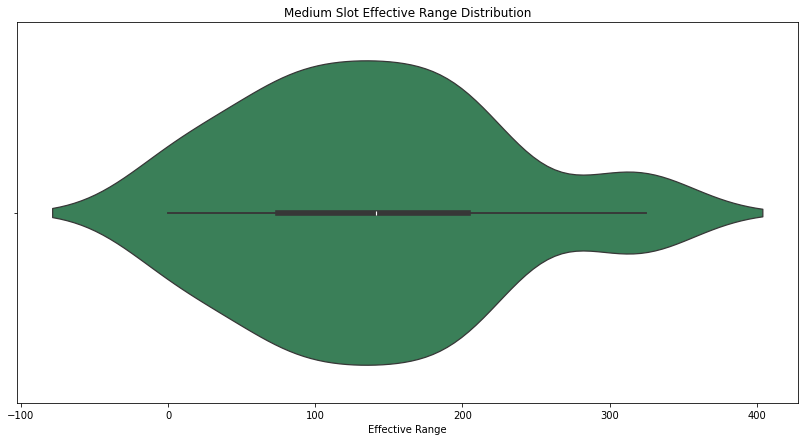

In [34]:
sns.violinplot(mediums, x='Effective Range', color='seagreen').set_title("Medium Slot Effective Range Distribution");

In [40]:
f"The Mean Muzzle Velocity of Medium Slot guns is {round( mediums['Effective Range'].mean())}. The Median Muzzle Velocity of Medium Slot guns is {round( mediums['Effective Range'].median())}."

'The Mean Muzzle Velocity of Medium Slot guns is 139. The Median Muzzle Velocity of Medium Slot guns is 141.'

Those two numbers are surprisingly close: good work Crytek! So, what weapons/bullets would we take if we wanted something above average?

In [41]:
# Spitzer > Long > FMJ | Medium > UpperMat and UpperCut P
mediums\
    .loc[ mediums['Effective Range'] > 140]\
    [['Weapon', 'Type', 'Effective Range', 'Cost']]\
    .drop_duplicates()\
    .sort_values('Effective Range', ascending=False)

,Weapon,Type,Effective Range,Cost
87,Mosin-Nagant N1891 Obrez,Spitzer,325.0,440.0
90,Mosin-Nagant N1891 Obrez Drum,Spitzer,325.0,500.0
85,Mosin-Nagant N1891 Obrez,Long,314.0,290.0
86,Mosin-Nagant N1891 Obrez,"Incendiary, Long",314.0,320.0
88,Mosin-Nagant N1891 Obrez Drum,Long,314.0,350.0
89,Mosin-Nagant N1891 Obrez Drum,"Incendiary, Long",314.0,380.0
147,Winfield M1876 Centennial Shorty,Full Metal Jacket,210.0,153.0
117,Springfield 1866 Compact,Springfield Dum Dum,204.0,58.0
124,Springfield 1866 Compact Deadeye,Medium,204.0,46.0
118,Springfield 1866 Compact,SpringField Explosive,204.0,78.0


And, there are the choices!

### Skipping the Modeling
In the previous post, I made some attempts to model out the small category weapons with the hunch that there was no functional model. And, my hunch was correct as it turned out that there were lots of problems trying to do this. Therefore, I have skipped this section and will come back around to solving that problem at the end. Once the large weapons have been analyzed, I am going to attempt to take a shot at trying to adjust the prices of all the weapons in the game.